# Attempt at background removal using simple clustering methods

Assumption: The background is a reasonably uniform color and has good contrast with the object

Proposed method:
- Cluster image by color
- Assume that the largest single cluster is the background, with possible confounding patches inside the object
- Cluster these pixels spatially
- Assume the largest cluster is the background

In [57]:
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.color import rgb2hsv

In [58]:
img = Image.open("test.jpg")
img = np.array(img)
hsv_img = rgb2hsv(img)

(-0.5, 3071.5, 4079.5, -0.5)

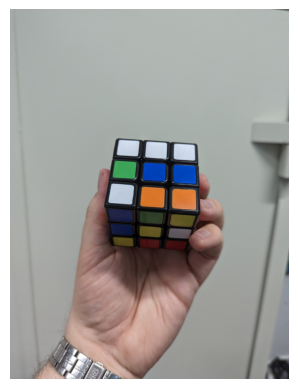

In [59]:
plt.imshow(img)
plt.axis('off')

(-0.5, 3071.5, 4079.5, -0.5)

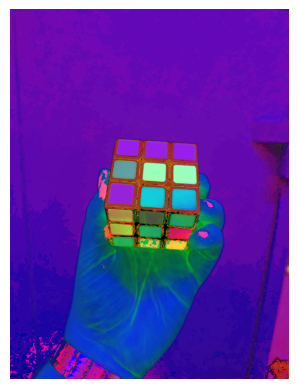

In [60]:
plt.imshow(hsv_img)
plt.axis('off')

In [61]:
pixel_view = hsv_img.reshape((hsv_img.shape[0] * hsv_img.shape[1], 3))

In [80]:
clusterer = cluster.KMeans(n_clusters = 4, n_init='auto')
labels = clusterer.fit_predict(pixel_view)

(-0.5, 3071.5, 4079.5, -0.5)

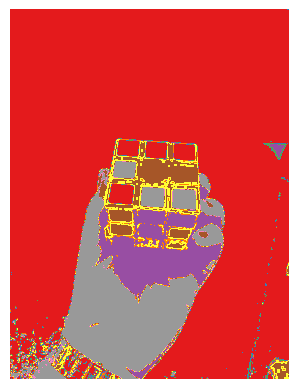

In [81]:
plt.imshow(np.reshape(labels, (hsv_img.shape[0], hsv_img.shape[1])), cmap="Set1")
plt.axis('off')

In [82]:
cluster_sizes = np.bincount(labels)
biggest_cluster = np.argmax(cluster_sizes)
print(f"Largest cluster: {biggest_cluster}")

Largest cluster: 0


In [83]:
labels_2d = np.reshape(labels, (img.shape[0], img.shape[1]))
large_cluster_pixels = np.nonzero(labels_2d == biggest_cluster)

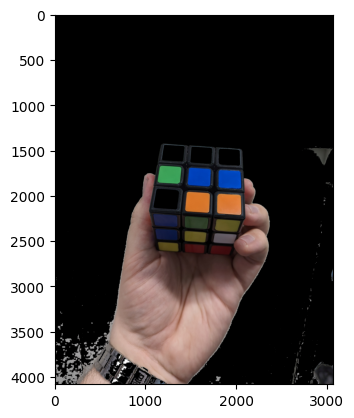

In [84]:
mask_img = np.copy(img)
mask_img[large_cluster_pixels] = 0

plt.imshow(mask_img)

In [85]:
positions = np.transpose(large_cluster_pixels)
pos_clust = cluster.DBSCAN(eps=3, min_samples=20)
pos_lbl = pos_clust.fit_predict(positions)
print(positions.shape)
print(pos_lbl.shape)

(9152592, 2)
(9152592,)


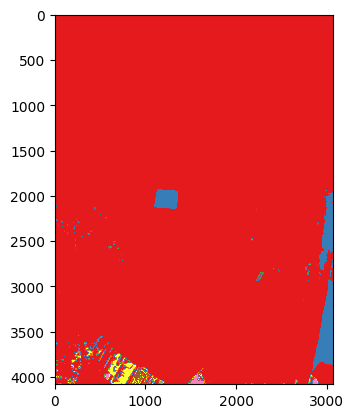

In [78]:
pos_clustering_viz = np.zeros_like(labels_2d)
pos_clustering_viz[large_cluster_pixels] = pos_lbl + 1

plt.imshow(pos_clustering_viz, cmap="Set1")

In [79]:
pos_lbl

array([  0,   0,   0, ..., 268, 268, 268], dtype=int64)